In [47]:
import matplotlib, cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

[120 137 224]


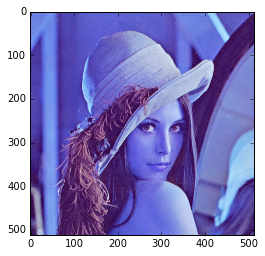

In [51]:
# 画像を読み込む
img = cv2.imread("../images/lena.jpg")

# matplotlibで表示してみる
print(img[0][0])
plt.imshow(img)

[224 137 120]


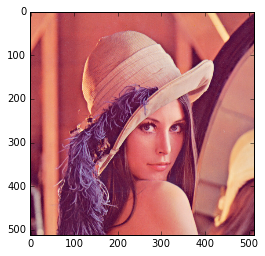

In [52]:
# OpenCVではRGBではなくBGRで色が読み込まれるのでRGBになおしてから表示する
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
print(img[0][0])
plt.imshow(img)

In [54]:
# numpyで行列変換した画像はどうなってるのか見てみる
print(img.shape)
print(img)

(512, 512, 3)
[[[224 137 120]
  [226 137 129]
  [225 137 135]
  ..., 
  [231 150 120]
  [214 127 108]
  [202 100  95]]

 [[224 137 120]
  [225 138 129]
  [225 137 135]
  ..., 
  [237 153 127]
  [217 130 110]
  [199  98  86]]

 [[224 138 123]
  [225 138 129]
  [224 136 132]
  ..., 
  [234 148 123]
  [220 129 108]
  [198 101  84]]

 ..., 
 [[ 83  23  57]
  [ 81  20  54]
  [ 92  28  63]
  ..., 
  [176  70  82]
  [173  65  78]
  [174  66  81]]

 [[ 82  22  56]
  [ 81  20  54]
  [ 96  32  67]
  ..., 
  [181  71  82]
  [180  70  81]
  [182  72  83]]

 [[ 82  22  56]
  [ 82  21  55]
  [ 98  34  69]
  ..., 
  [181  70  77]
  [184  73  80]
  [186  75  84]]]


In [35]:
# 512 x512の画像なので2次元のimg配列の0行目の最後の画素のRGB値は以下で表示できる
print(img[0][511])

[202 100  95]


(512, 512)
[[161 163 163 ..., 171 151 130]
 [161 163 163 ..., 175 154 127]
 [162 163 162 ..., 171 154 128]
 ..., 
 [ 45  42  51 ..., 103  99 100]
 [ 44  42  55 ..., 105 104 106]
 [ 44  43  57 ..., 104 107 109]]
(512, 512, 3)
[[[161 161 161]
  [163 163 163]
  [163 163 163]
  ..., 
  [171 171 171]
  [151 151 151]
  [130 130 130]]

 [[161 161 161]
  [163 163 163]
  [163 163 163]
  ..., 
  [175 175 175]
  [154 154 154]
  [127 127 127]]

 [[162 162 162]
  [163 163 163]
  [162 162 162]
  ..., 
  [171 171 171]
  [154 154 154]
  [128 128 128]]

 ..., 
 [[ 45  45  45]
  [ 42  42  42]
  [ 51  51  51]
  ..., 
  [103 103 103]
  [ 99  99  99]
  [100 100 100]]

 [[ 44  44  44]
  [ 42  42  42]
  [ 55  55  55]
  ..., 
  [105 105 105]
  [104 104 104]
  [106 106 106]]

 [[ 44  44  44]
  [ 43  43  43]
  [ 57  57  57]
  ..., 
  [104 104 104]
  [107 107 107]
  [109 109 109]]]


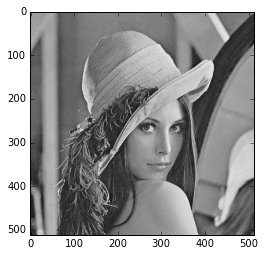

In [58]:
# グレースケールに変換してみる
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(gray_img.shape)
print(gray_img)

# 表示する
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
print(gray_img.shape)
print(gray_img)
plt.imshow(gray_img)

(512, 3)
(3,)
[ 180.22293472   99.05350113  105.44477463]
[180  99 105]


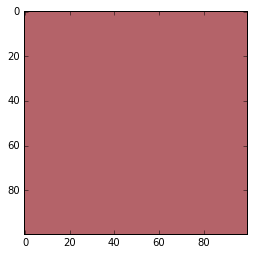

In [59]:
#####################
#  画像の平均色を求めるやつ #
#####################

# 各行ごとRGBの平均値を計算するので出力は512x3の行列になる
average_color_per_row = np.average(img, axis=0)
print( average_color_per_row.shape )

# さらに各行のRGB平均値512x3の行列からそれらの平均を計算して1x3のベクトルを作る
average_color = np.average(average_color_per_row, axis=0)
print(average_color.shape)
print(average_color)

# 求めたRGB値を整数に直す
average_color = np.uint8(average_color)
print(average_color)

# 求めたRGBの色を表示する
average_color_img = np.array([[average_color] * 100] * 100, np.uint8)
plt.imshow(average_color_img)

(512, 512)


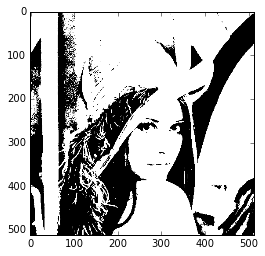

In [71]:
# 閾値処理
# グレースケール画像のRGBが100~255の範囲の値で0にそれ以外を255にする
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, threshold_img = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
print(threshold_img.shape)

# 表示
threshold_img = cv2.cvtColor(threshold_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_img)

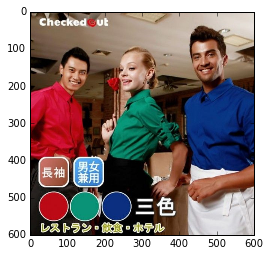

In [78]:
# RGBがわかりやすい画像
# 出典(http://store.shopping.yahoo.co.jp/muchushop/cooker20028.html)
piet = cv2.imread("../images/rgb_people.jpg")
piet_original = cv2.cvtColor(piet, cv2.COLOR_BGR2RGB)
plt.imshow(piet_original) 

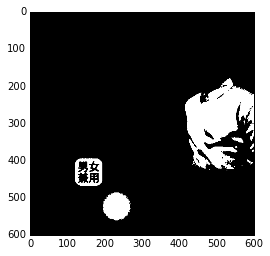

In [85]:
# カラー画像で閾値処理
# RGBのB(青)の色部分だけで抽出する
piet = cv2.imread("../images/rgb_people.jpg")
piet_hsv = cv2.cvtColor(piet, cv2.COLOR_BGR2HSV)

#  HSVの色範囲を指定する
# ただHSVのOpenCVでのHの扱いには注意が必要だ
# HSVのH(色相)は0~360の範囲で色が変わる
# OpenCVではこの0~360 / 2の値を指定する必要がある
# つまりmin_hsvのH=100は実際は200である
# 同様にmax_hsvのH=140は実際は280である
#  試しに(H,S,V) = (200, 255,255)を下記のサイトで見てみると良い
# http://www.peko-step.com/tool/hsvrgb.html
min_hsv = [100, 100, 100] # [H, S, V]
max_hsv = [140, 255, 255] # [H, S, V]
blue_min = np.array(min_hsv, np.uint8)
blue_max = np.array(max_hsv, np.uint8)
threshold_blue_img = cv2.inRange(piet_hsv, blue_min, blue_max)

# RGBになおして表示する
threshold_blue_img = cv2.cvtColor(threshold_blue_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_blue_img)

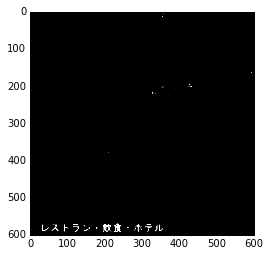

In [109]:
# どうやったら、この絵から赤、または黄の部分を取り出せるでしょうか。
# また、もし色の全色相を0から255で表すことができるとしたら、赤、または黄にどの範囲を使えばいいでしょうか。

# 黄色
min_hsv = [20, 100, 100] # [H, S, V]
max_hsv = [60, 255, 255] # [H, S, V]

yellow_min = np.array(min_hsv, np.uint8)
yellow_max = np.array(max_hsv, np.uint8)
threshold_yellow_img = cv2.inRange(piet_hsv, yellow_min, yellow_max)
threshold_yellow_img = cv2.cvtColor(threshold_yellow_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_yellow_img)

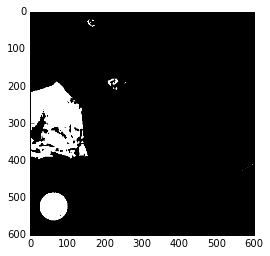

In [106]:
# 赤
min_hsv = [140, 100, 100] # [H, S, V]
max_hsv = [180, 255, 255] # [H, S, V]

red_min = np.array(min_hsv, np.uint8)
red_max = np.array(max_hsv, np.uint8)
threshold_red_img = cv2.inRange(piet_hsv, red_min, red_max)
threshold_red_img = cv2.cvtColor(threshold_red_img, cv2.COLOR_GRAY2RGB)
plt.imshow(threshold_red_img)

# ちなみに緑
# min_hsv = [70, 100, 100] # [H, S, V]
# max_hsv = [100, 255, 255] # [H, S, V]

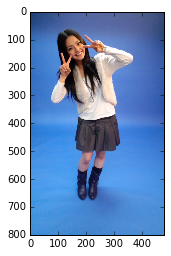

In [140]:
# 2値化閾値でマスキング
# RGBがわかりやすい画像
# 出典(http://kaku-c.at.webry.info/200910/article_6.html)
blue_girl = cv2.imread("../images/blueback_girl.jpg")
blue_girl_original = cv2.cvtColor(blue_girl, cv2.COLOR_BGR2RGB)
plt.imshow(blue_girl_original) 

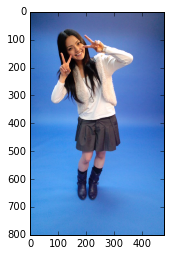

In [138]:
# ガウシアンぼかし
blue_girl_original = cv2.imread("../images/blueback_girl.jpg")
img_blur_small = cv2.GaussianBlur(blue_girl_original, (5, 5), 0)
img_blur_small = cv2.cvtColor(img_blur_small, cv2.COLOR_BGR2RGB)
plt.imshow(img_blur_small)

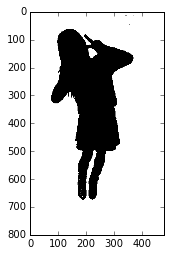

In [141]:
# HSV変換
blue_girl_hsv = cv2.cvtColor(blue_girl, cv2.COLOR_BGR2HSV)

#  青の範囲で2値化して画像生成
min_hsv = [100, 100, 100]
max_hsv = [140, 255, 255]
blue_min = np.array(min_hsv, np.uint8)
blue_max = np.array(max_hsv, np.uint8)
mask_inverse = cv2.inRange(blue_girl_hsv, blue_min, blue_max)
mask_inverse_tmp = cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB)
plt.imshow(mask_inverse_tmp)

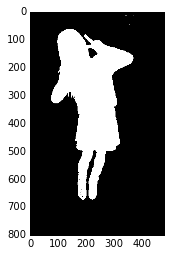

In [142]:
# 青の範囲が白かった画像を反転させた画像をマスク画像にする
mask_inverse = cv2.inRange(blue_girl_hsv, blue_min, blue_max)
# 1が0になり、0が1になる
mask = cv2.bitwise_not(mask_inverse)
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

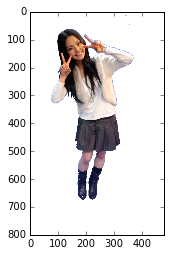

In [143]:
# 白黒のマスク画像のRGB値を3色に変換
mask_rgb = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)

#  マスク画像を使って元画像から差し引く
# 同じbitの箇所が1になって、その他の場合はそのままの値？
masked_girl = cv2.bitwise_and(blue_girl, mask_rgb)

#  マスク画像で青色背景を切り抜いた女の子の画像と
# 青色背景以外を切り抜いた2値画像を3色RGBに戻した画像を
#  1:1で合成
masked_replace_white = cv2.addWeighted(masked_girl, 1, \
                                       cv2.cvtColor(mask_inverse, cv2.COLOR_GRAY2RGB), 1, 0)

# 表示
plt.imshow(cv2.cvtColor(masked_replace_white, cv2.COLOR_BGR2RGB))

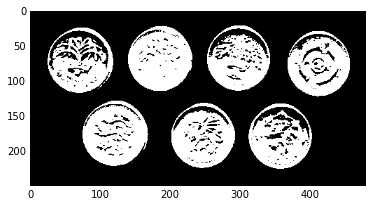

In [170]:
# 輪郭検出を行う前の2値化処理
# 出典(http://www.kisc.meiji.ac.jp/~endokosh/eikokucoin.htm)
coins = cv2.imread('../images/pond.jpg')
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
coins_preprocessed = cv2.GaussianBlur(coins_gray, (3, 3), 0)

_, coins_binary = cv2.threshold(coins_preprocessed, 130, 255,  \
                                cv2.THRESH_BINARY)

coins_binary = cv2.bitwise_not(coins_binary)

plt.imshow(cv2.cvtColor(coins_binary, cv2.COLOR_GRAY2RGB))

number of coins: 7


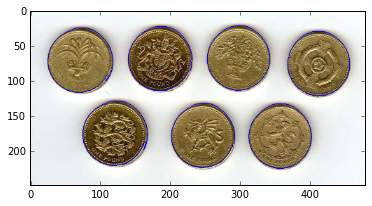

In [171]:
# 輪郭を見つける
# RETR_EXTERNALは外郭のみ検出する
_, coins_contours, _  = cv2.findContours(coins_binary, cv2.RETR_EXTERNAL, \
                                     cv2.CHAIN_APPROX_SIMPLE)

# 元画像オブジェクトコピー
coins_and_contours = np.copy(coins)

#  コインのサイズに制限を設けてそれ以下のノイズなどを省く
min_coin_area = 60
large_contours = [cnt for cnt in coins_contours if cv2.contourArea(cnt) > min_coin_area]

cv2.drawContours(coins_and_contours, large_contours, -1, (255,0,0))

print('number of coins: %d' % len(large_contours))

plt.imshow(cv2.cvtColor(coins_and_contours, cv2.COLOR_BGR2RGB))